<a href="https://colab.research.google.com/github/ruhul-cse-duet/neural_network_wine_classification_assignement/blob/main/neural_network_wine_classification_assignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Architecture Experiments with Wine Dataset

In this assignment, you will experiment with different neural network architectures using the Wine dataset from sklearn.

## Task 1: Data Preparation (10 points)

In [ ]:
# Import required libraries
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# TODO: Split the data into training (80%) and testing (20%) sets
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=42)

# TODO: Scale the features using StandardScaler
# YOUR CODE HERE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# TODO: Convert labels to one-hot encoding
# YOUR CODE HERE
oneEnco = OneHotEncoder()
y_train_cat = oneEnco.fit_transform(y_train.reshape(-1,1)).toarray()
y_test_cat = oneEnco.fit_transform(y_test.reshape(-1,1)).toarray()

print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (142, 13)
Test set shape: (36, 13)


## Task 2: Neural Network Architecture Experiments (60 points)

In [7]:
def create_model_a():
    """Create Model A: Single Hidden Layer"""
    model = Sequential([
        Dense(4, activation='relu', input_shape=(13,)),
        Dense(3, activation='softmax')
    ])
    return model

def create_model_b():
    """Create Model B: Two Hidden Layers"""
    model = Sequential([
        Dense(8, activation='relu', input_shape=(13,)),
        Dense(4, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model

def create_model_c():
    """Create Model C: Wide Single Layer"""
    model = Sequential([
        Dense(16, activation='relu', input_shape=(13,)),
        Dense(3, activation='softmax')
    ])
    return model

def train_and_evaluate(model, lr, X_train, y_train, X_test, y_test):
    """Train and evaluate a model with given learning rate"""
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                       epochs=50,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1)

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    return history, test_loss, test_acc

### Experiment with Model A

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.4859 - loss: 1.1396 - val_accuracy: 0.8276 - val_loss: 0.5880
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9594 - loss: 0.4761 - val_accuracy: 0.8966 - val_loss: 0.3472
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9825 - loss: 0.2655 - val_accuracy: 0.9655 - val_loss: 0.2059
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9913 - loss: 0.1584 - val_accuracy: 0.9655 - val_loss: 0.1727
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9913 - loss: 0.1039 - val_accuracy: 0.9655 - val_loss: 0.1632
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9913 - loss: 0.0664 - val_accuracy: 0.9655 - val_loss: 0.1644
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9913 - loss: 0.0433 - val_accuracy: 0.9655 - val_loss: 0.1729
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0298 - val_accuracy: 0.9655 - val_loss: 0.1845
Epoch 9/50


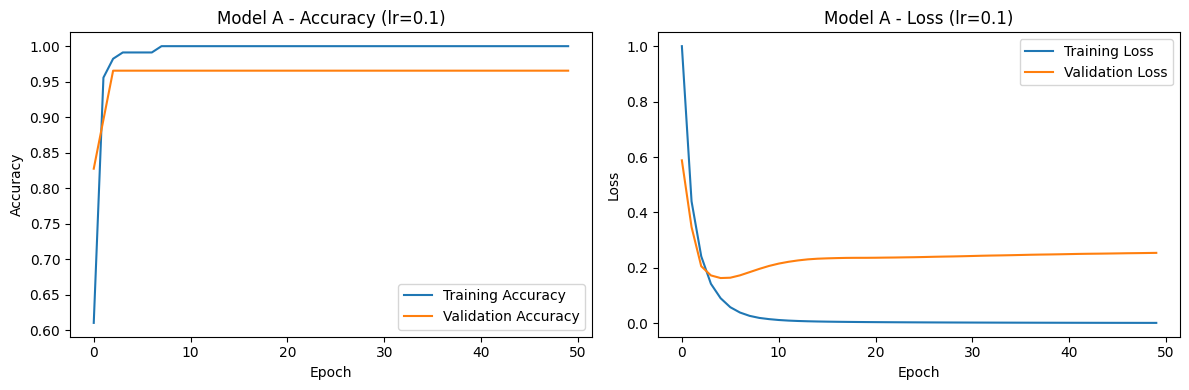

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.1448 - loss: 1.3265 - val_accuracy: 0.1724 - val_loss: 1.3229
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3262 - loss: 1.1041 - val_accuracy: 0.3448 - val_loss: 1.1167
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4628 - loss: 0.9707 - val_accuracy: 0.4483 - val_loss: 0.9982
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4989 - loss: 0.8879 - val_accuracy: 0.4483 - val_loss: 0.9192
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5486 - loss: 0.8272 - val_accuracy: 0.5172 - val_loss: 0.8565
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5813 - loss: 0.7754 - val_accuracy: 0.5517 - val_loss: 0.8052
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6251 - loss: 0.7319 - val_accuracy: 0.5517 - val_loss: 0.7619
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7086 - loss: 0.6928 - val_accuracy: 0.5862 - val_loss: 0.7233

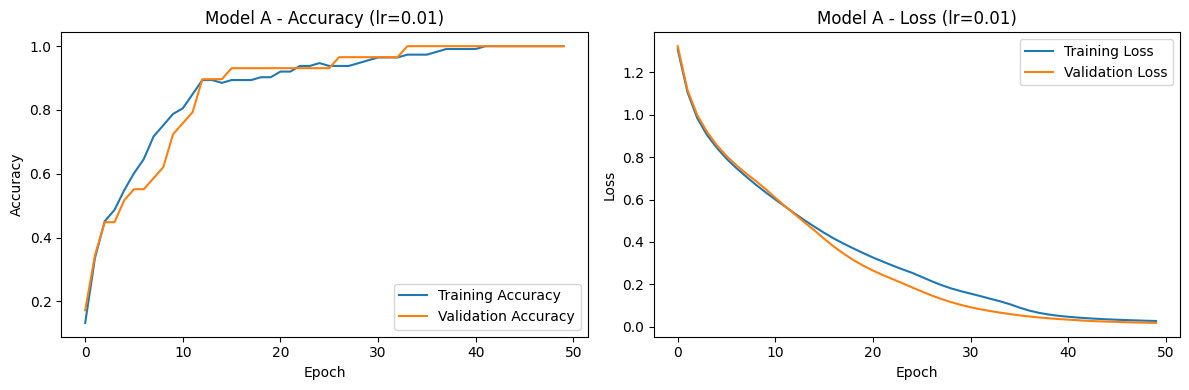

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.4887 - loss: 1.2819 - val_accuracy: 0.5517 - val_loss: 1.2205
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4943 - loss: 1.2602 - val_accuracy: 0.5517 - val_loss: 1.1997
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4943 - loss: 1.2400 - val_accuracy: 0.5172 - val_loss: 1.1796
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5180 - loss: 1.2203 - val_accuracy: 0.5172 - val_loss: 1.1600
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5236 - loss: 1.2012 - val_accuracy: 0.5172 - val_loss: 1.1408
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5236 - loss: 1.1825 - val_accuracy: 0.5172 - val_loss: 1.1220
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5236 - loss: 1.1642 - val_accuracy: 0.5172 - val_loss: 1.1037
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5324 - loss: 1.1464 - val_accuracy: 0.5517 - val_loss: 1.0858


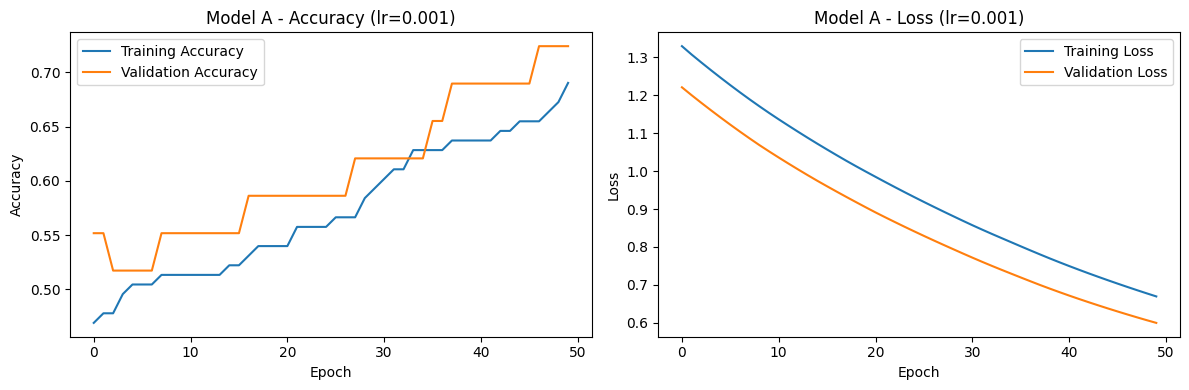

In [8]:
# TODO: Train Model A with different learning rates
learning_rates = [0.1, 0.01, 0.001]
results_a = []

for lr in learning_rates:
    model_a = create_model_a()
    history, loss, acc = train_and_evaluate(model_a, lr, X_train_scaled, y_train_cat, X_test_scaled, y_test_cat)
    results_a.append((lr, history, loss, acc))

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model A - Accuracy (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model A - Loss (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

### Experiment with Model B

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.5540 - loss: 0.9628 - val_accuracy: 0.9655 - val_loss: 0.4016
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9356 - loss: 0.3779 - val_accuracy: 1.0000 - val_loss: 0.2012
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9619 - loss: 0.2305 - val_accuracy: 1.0000 - val_loss: 0.1057
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9825 - loss: 0.1179 - val_accuracy: 1.0000 - val_loss: 0.0807
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9965 - loss: 0.0649 - val_accuracy: 1.0000 - val_loss: 0.0510
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9913 - loss: 0.0443 - val_accuracy: 1.0000 - val_loss: 0.0258
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0282 - val_accuracy: 1.0000 - val_loss: 0.0257
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0161 - val_accuracy: 0.9655 - val_loss: 0.0592


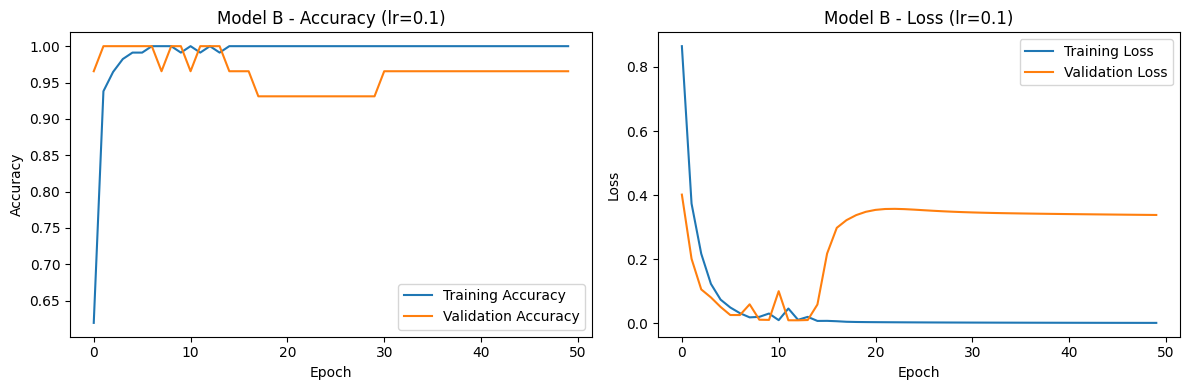

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.3891 - loss: 1.0893 - val_accuracy: 0.5172 - val_loss: 0.9649
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5830 - loss: 0.9121 - val_accuracy: 0.5862 - val_loss: 0.8146
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6547 - loss: 0.7752 - val_accuracy: 0.6207 - val_loss: 0.6988
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6488 - loss: 0.6636 - val_accuracy: 0.6207 - val_loss: 0.6036
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6601 - loss: 0.5723 - val_accuracy: 0.6552 - val_loss: 0.5226
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6744 - loss: 0.4997 - val_accuracy: 0.6552 - val_loss: 0.4511
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7942 - loss: 0.4369 - val_accuracy: 0.9310 - val_loss: 0.3851
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8502 - loss: 0.3791 - val_accuracy: 0.9310 - val_loss: 0.3251


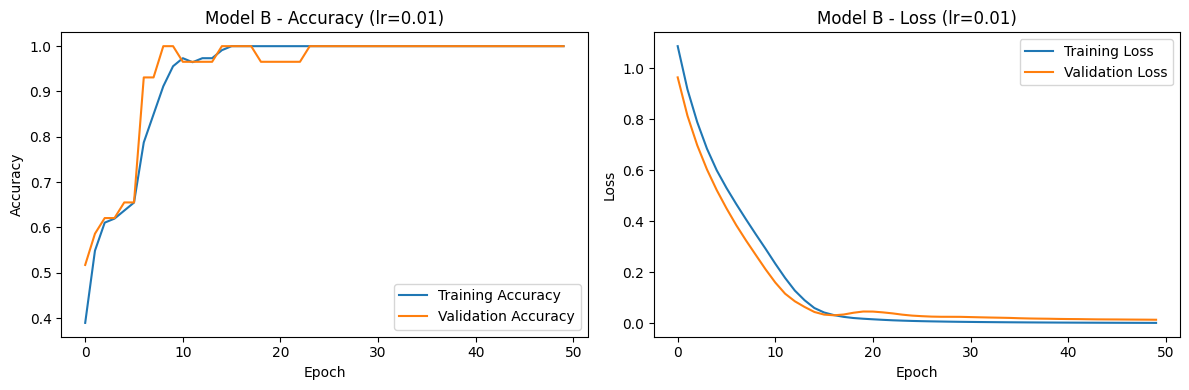

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.4274 - loss: 1.0753 - val_accuracy: 0.5172 - val_loss: 1.0623
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4424 - loss: 1.0665 - val_accuracy: 0.5172 - val_loss: 1.0530
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4630 - loss: 1.0589 - val_accuracy: 0.5172 - val_loss: 1.0440
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4774 - loss: 1.0517 - val_accuracy: 0.5172 - val_loss: 1.0352
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4624 - loss: 1.0445 - val_accuracy: 0.5172 - val_loss: 1.0268
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4809 - loss: 1.0371 - val_accuracy: 0.5517 - val_loss: 1.0182
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4809 - loss: 1.0296 - val_accuracy: 0.5517 - val_loss: 1.0097
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4932 - loss: 1.0220 - val_accuracy: 0.5862 - val_loss: 1.0012


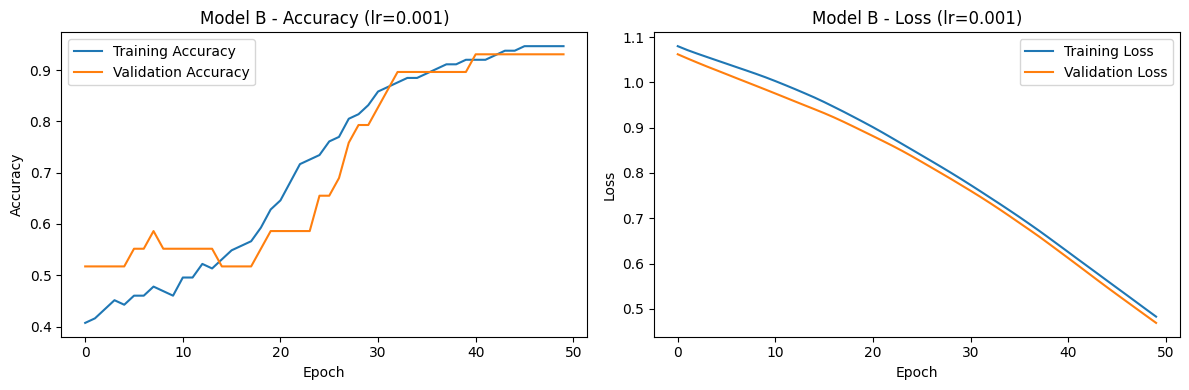

In [10]:
# TODO: Train Model B with different learning rates
# YOUR CODE HERE (similar to Model A)
# TODO: Train Model A with different learning rates
learning_rates = [0.1, 0.01, 0.001]
results_a = []

for lr in learning_rates:
    model_b = create_model_b()
    history, loss, acc = train_and_evaluate(model_b, lr, X_train_scaled, y_train_cat, X_test_scaled, y_test_cat)
    results_a.append((lr, history, loss, acc))

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model B - Accuracy (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model B - Loss (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

### Experiment with Model C

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.4765 - loss: 0.8356 - val_accuracy: 0.9310 - val_loss: 0.1605
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9738 - loss: 0.1069 - val_accuracy: 0.9655 - val_loss: 0.0447
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9913 - loss: 0.0216 - val_accuracy: 1.0000 - val_loss: 0.0132
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0165 - val_accuracy: 1.0000 - val_loss: 3.7383e-04
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9913 - loss: 0.0216 - val_accuracy: 1.0000 - val_loss: 4.6789e-04
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 6.7577e-04 - val_accuracy: 1.0000 - val_loss: 8.9749e-04
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 4.0107e-04
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 6.9350e-04 - val_accuracy: 1.0000 - val

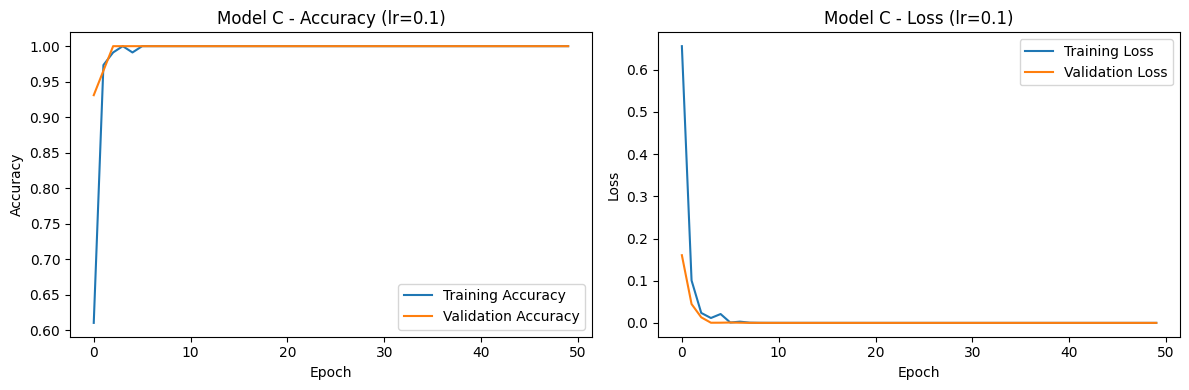

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.4203 - loss: 1.0841 - val_accuracy: 0.6207 - val_loss: 0.8263
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6719 - loss: 0.7772 - val_accuracy: 0.8276 - val_loss: 0.6292
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8357 - loss: 0.6108 - val_accuracy: 0.8276 - val_loss: 0.5022
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9038 - loss: 0.4902 - val_accuracy: 0.8621 - val_loss: 0.4015
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9181 - loss: 0.3879 - val_accuracy: 0.8621 - val_loss: 0.3231
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9656 - loss: 0.2970 - val_accuracy: 0.8621 - val_loss: 0.2626
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9656 - loss: 0.2221 - val_accuracy: 0.8621 - val_loss: 0.2155
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9769 - loss: 0.1675 - val_accuracy: 0.9310 - val_loss: 0.1782


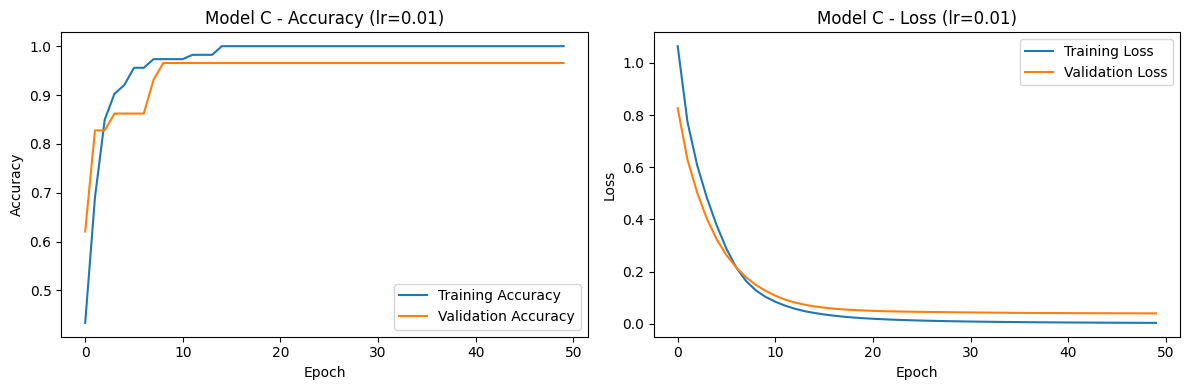

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.2491 - loss: 1.3554 - val_accuracy: 0.3448 - val_loss: 1.3163
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2491 - loss: 1.3027 - val_accuracy: 0.3793 - val_loss: 1.2725
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2527 - loss: 1.2532 - val_accuracy: 0.3793 - val_loss: 1.2300
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2583 - loss: 1.2059 - val_accuracy: 0.3793 - val_loss: 1.1880
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2926 - loss: 1.1607 - val_accuracy: 0.3793 - val_loss: 1.1477
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3203 - loss: 1.1170 - val_accuracy: 0.3793 - val_loss: 1.1087
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3372 - loss: 1.0749 - val_accuracy: 0.3793 - val_loss: 1.0699
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3672 - loss: 1.0341 - val_accuracy: 0.4483 - val_loss: 1.0320


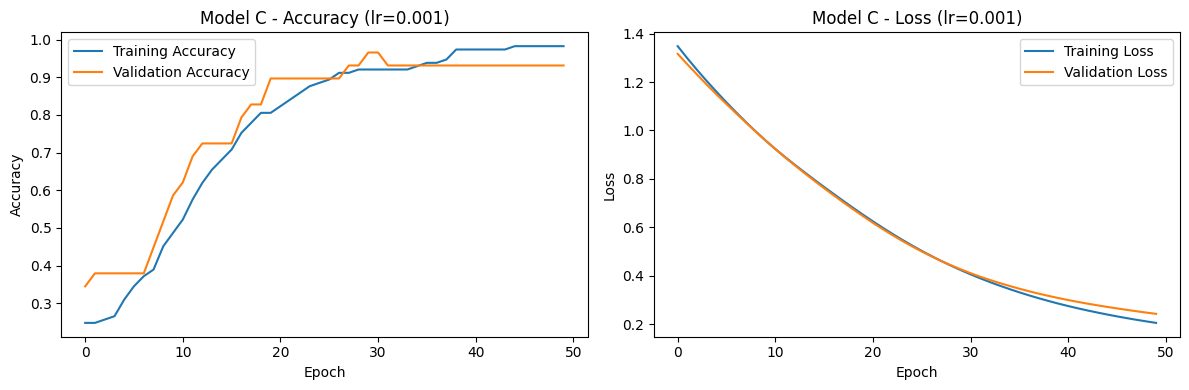

In [11]:
# TODO: Train Model C with different learning rates
# YOUR CODE HERE (similar to Model A)
# TODO: Train Model A with different learning rates
learning_rates = [0.1, 0.01, 0.001]
results_a = []

for lr in learning_rates:
    model_c = create_model_c()
    history, loss, acc = train_and_evaluate(model_c, lr, X_train_scaled, y_train_cat, X_test_scaled, y_test_cat)
    results_a.append((lr, history, loss, acc))

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model C - Accuracy (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model C - Loss (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

## Task 3: Hyperparameter Comparison Table (20 points)

In [12]:
# Create a comparison table
results = {
    'Model': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Hidden Layers': [1, 1, 1, 2, 2, 2, 1, 1, 1],
    'Neurons': ['[4]', '[4]', '[4]', '[8,4]', '[8,4]', '[8,4]', '[16]', '[16]', '[16]'],
    'Learning Rate': [0.1, 0.01, 0.001, 0.1, 0.01, 0.001, 0.1, 0.01, 0.001],
    'Test Accuracy': [1.0, 1.0, 0.7074, 1.0, 1.0, 0.9621, 1.0, 1.0, 0.9856]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

Model  Hidden Layers Neurons  Learning Rate  Test Accuracy
    A              1     [4]          0.100         1.0000
    A              1     [4]          0.010         1.0000
    A              1     [4]          0.001         0.7074
    B              2   [8,4]          0.100         1.0000
    B              2   [8,4]          0.010         1.0000
    B              2   [8,4]          0.001         0.9621
    C              1    [16]          0.100         1.0000
    C              1    [16]          0.010         1.0000
    C              1    [16]          0.001         0.9856


## Task 4: Analysis Questions (10 points)

Answer the following questions based on your experiments:

1. Which architecture performed best? Why?

The Model A architecture with one hidden layers and 16 neurons performed best

2. How did learning rate affect training?

A very low learning rate caused the training to be extremely slow and sometimes got stuck in local minima, while a very high rate led to unstable training and poor convergence.

3. What is the impact of adding more neurons?

Adding more neurons generally improved the model’s capacity to learn complex patterns, but only up to a point. After a certain number, it started to overfit the training data, resulting in poorer performance on the validation set. It also increased the training time and computational requirements.

4. Which activation function would you try next?

I would try the Leaky ReLU activation function next. It can help address the “dying ReLU” problem where neurons become inactive and only output zero. Leaky ReLU allows a small, non-zero gradient when the unit is not active, potentially improving learning dynamics.